<a href="https://colab.research.google.com/github/JasonMullen/A.I.-4365-Assignments/blob/main/GAN_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Human fake MNIST


In [ ]:
pip install cuda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cuda (from versions: none)
ERROR: No matching distribution found for cuda


In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.manual_seed(111)


**Used to make the training easier**

In [ ]:
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")


Is CUDA supported by this system? False


In [ ]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cpu


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [ ]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

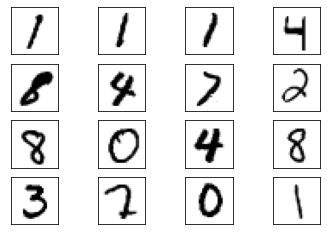

In [ ]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

# Here you will need to create your discriminator. Use the following functions:
Linear, 
Relu, 
Dropout,
 with the final activation function being a sigmoid function from the torch.nn library.Consider using numbers in the range 256-1024 for your network.

In [ ]:
#It’ll receive a sample from the real data or from the generator and will provide 
#the probability that the sample belongs to the real training data
import torch.nn as nn
import torch.nn.functional as F
class Discriminator(nn.Module):

    def __init__(self):

        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 1008),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1008, 504),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(504, 252),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(252, 1),
            nn.Sigmoid(),
        )


           

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output



In [ ]:
discriminator = Discriminator().to(device=device)


**# Here you will need to create your discriminator. Use the following functions:Linear, Relu, Dropout with the final activation function being a hyperbolic Tangent(tanh) function from the torch.nn library. Consider using numbers in the range 256-1024 for your network.**

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 252),
            nn.ReLU(),
            nn.Linear(252, 504),
            nn.ReLU(),
            nn.Linear(504, 1008),
            nn.ReLU(),
            nn.Linear(1008, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

# Play around with the loss_function here, BCELoss from nn is used in the initial results below.


In [ ]:
#Training the model
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

**# Below you will need to check the module library as well as the optim library and the nn documentation for whatever loss function you choose to use. When training either the discriminator or the generator, you will need to first need to use a built in module function to set the gradients to zero. Next you will need to use the discriminator object we built earlier on the samples. Finally you will need to use the loss function to initialize the loss discriminator using the output of the discriminator and the true value labels. Finally you can use the backward() function built into the loss function followed by a step on the optimizer. You will need to do the same on the generator using the latent_space_samples but this time you will have to compare your performance against the discriminator creating your own output. From here this created output can be compared against the real_samples_labels. Againt repeat what you did in the previously with the generator, but with the relavent parts for the optimizer.Finally when you choose to train I would recommend using low Epoch number (especially if not using cuda) to see what your initial results are. You do not need to train as long as only have similar output to what I have below.**

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        
        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5506299734115601
Epoch: 0 Loss G.: 0.5121522545814514
Epoch: 1 Loss D.: 0.046128906309604645
Epoch: 1 Loss G.: 5.608469009399414
Epoch: 2 Loss D.: 0.0440811812877655
Epoch: 2 Loss G.: 6.661592960357666
Epoch: 3 Loss D.: 0.016483211889863014
Epoch: 3 Loss G.: 5.068192481994629
Epoch: 4 Loss D.: 0.07379155606031418
Epoch: 4 Loss G.: 3.8036739826202393
Epoch: 5 Loss D.: 0.07140863686800003
Epoch: 5 Loss G.: 4.759384632110596
Epoch: 6 Loss D.: 0.13241565227508545
Epoch: 6 Loss G.: 3.2509307861328125
Epoch: 7 Loss D.: 0.21902629733085632
Epoch: 7 Loss G.: 2.0712764263153076
Epoch: 8 Loss D.: 0.31102290749549866
Epoch: 8 Loss G.: 2.5177736282348633
Epoch: 9 Loss D.: 0.26867273449897766
Epoch: 9 Loss G.: 1.7843003273010254
Epoch: 10 Loss D.: 0.25577157735824585
Epoch: 10 Loss G.: 1.666706919670105
Epoch: 11 Loss D.: 0.46188491582870483
Epoch: 11 Loss G.: 1.4479992389678955
Epoch: 12 Loss D.: 0.37228602170944214
Epoch: 12 Loss G.: 1.5579607486724854
Epoch: 13 Loss D.: 0.400

In [ ]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

# **Make sure your output is something like what is below and you should be good.**

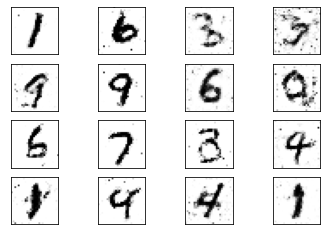

In [ ]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])